# MS763: Applied Markov processes |  Limit theorems

Hugo Touchette

7 August 2020

Last updated: 11 August 2020

Python 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Generate random variables

This generates a random value, in this case a random value distributed according to $\mathcal{N}(1,1)$:

In [18]:
print(np.random.normal(1, 1))

3.0543792493711974


In [21]:
print(np.random.normal(1, 1, 10))

[ 1.41987048  1.98554544  2.55141402  0.2674807  -1.09265719 -0.43210737
  1.15048801  1.32546858  1.95316765  2.33896463]


In this demonstration, we'll want to generate random values for the sum
$$
S_n = \sum_{i=1}^n X_i.
$$
Thus we have first to generate $n$ individual random values and then add them. Here we use $n=5$:

In [22]:
vars = np.random.normal(1, 1, 5)
print(vars)
my_sum = np.sum(vars)
print(my_sum)

[1.40793536 1.45557012 0.4968993  0.59183011 2.93746081]
6.889695702176345


## Law of large numbers

To illustrate the law of large numbers, we need to generate a sample of many sample means to find its distribution. Here we look at
$$
\frac{S_n}{n}=\frac{1}{n}\sum_{i=1}^n X_i
$$
with $n=10,50$ and $100$, and $X_i\sim\mathcal{N}(1,1)$. The sample size will be $L=10000$.

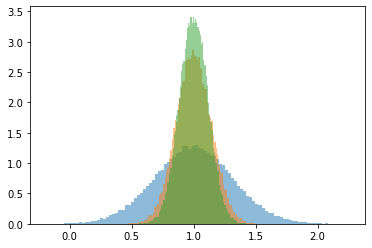

In [28]:
nvals = [10, 50, 75]
L = 50000
sample = np.zeros([len(nvals), L])

for k in range(len(nvals)):
    n = nvals[k]

    for j in range(L):
        vars = np.random.normal(1, 1, n)
        sample[k, j] = np.mean(vars)

plt.hist(sample[0,:], 100, density=True, alpha=0.5)
plt.hist(sample[1,:], 100, density=True, alpha=0.5)
plt.hist(sample[2,:], 100, density=True, alpha=0.5)
plt.show()

We see that the distribution gets more and more peaked around the mean $\mu=1$.

## Central Limit Theorem

To illustrate the central limit theorem, the code is similar. The only difference is that we look at a different rescaling of the sum of RVs. Moreover, we'll look at a sum of Bernoulli RVs instead of Gaussian RVs. Recall that the mean of $\textrm{Bern}(p)$ is $\mu=p$ while its variance is $\sigma^2=p(1-p)$.

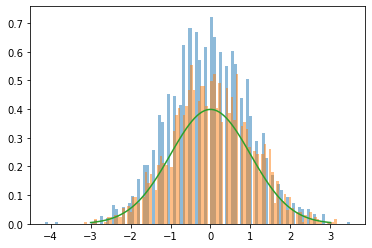

In [32]:
p = 0.4
nvals = [250, 700]
L = 2000
sample = np.zeros([len(nvals), L])

for k in range(len(nvals)):
    n = nvals[k]

    for j in range(L):
        vars = np.random.binomial(1, p, n)
        sample[k, j] = (np.sum(vars) - n*p)/np.sqrt(n)/np.sqrt(p*(1-p))

plt.hist(sample[0, :], 100, density=True, alpha=0.5)
plt.hist(sample[1, :], 100, density=True, alpha=0.5)
axes=np.linspace(-3,3,100)
plt.plot(axes, norm(0,1).pdf(axes))
plt.show()

Change the values of $n$: you'll see a slow convergence towards $\mathcal{N}(0,1)$ by increasing $n$.